In [1]:
# all of the imports
import pandas as pd
import numpy as np
import pickle 
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
% matplotlib inline
from sklearn import feature_selection as f_select

import os.path

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import cross_val_score
from sklearn import linear_model

import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
DATA_DIR = os.path.join("nba_FINALDATA_ytransform.csv")
nba_df = pd.read_csv(os.path.join(DATA_DIR))
nba_df.drop(['Unnamed: 0'], axis=1, inplace=True)

# split our data into 80 train and 20 test

In [3]:
#splitting it into 80/20 - smaller dataset
X_train, X_test, y_train, y_test = train_test_split(nba_df.loc[:, nba_df.columns != 'sqrty'], nba_df.sqrty, test_size=0.2, random_state =1234)

# Model Building - Excuse my weird labeling.. I am starting from Model 3 to Model 1 to Model 2

# MODEL 3 - include ALL numerics features in the linear regression (except age). regress on sqrt(y)

In [6]:
#train
y = y_train
X = X_train[['G', 'GS', 'MP', 'FG', 'FGA', 'FG_Per','threeP', 'threePA', 'threeP_Perc', 'twoP', 'twoPA', 'twoP_Per','eFG_Per', 'FT', 'FTA', 'FT_Per', 'ORB', 'DRB', 'TRB', 'AST', 'STL','BLK', 'TOV', 'PF', 'PS_Game', 'playoff']]

#test
y_test = y_test 
X_test = X_test[['G', 'GS', 'MP', 'FG', 'FGA', 'FG_Per','threeP', 'threePA', 'threeP_Perc', 'twoP', 'twoPA', 'twoP_Per','eFG_Per', 'FT', 'FTA', 'FT_Per', 'ORB', 'DRB', 'TRB', 'AST', 'STL','BLK', 'TOV', 'PF', 'PS_Game', 'playoff']]

# Linear Regression Model

In [7]:
linreg = LinearRegression()

#5 fold cross-validation r^2 mean score
linreg_scores = cross_val_score(linreg, X, y, cv=5)

print(np.mean(linreg_scores))

0.553474398667


In [8]:
linreg.fit(X, y)
linreg.score(X_test, y_test)

0.59503482943043751

In [9]:
linreg.score(X, y)

0.63370756517881832

**OVERFITTING!!**

# Ridge Linear Regression Model

**find the best hyperparameters using grid search**

In [10]:
# Define the parameter values that should be searched
alpha_range = [1e-4, 1e-3, 1.5e-3, 1e-2, 1.5e-2, 1e-1, 1, 5, 10, 50, 100, 1000, 10000, 100000]
normalize_range = [True, False]
print(alpha_range, normalize_range)

# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(alpha=alpha_range, normalize=normalize_range)
print(param_grid)

# Instantiate the grid
grid = GridSearchCV(Ridge(), param_grid, cv=5)
grid.fit(X, y)

# View best parameter
print("Best parameters set found on development set:")
print()
print(grid.best_params_)
print()
print("Grid scores on development set:")
print()
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']

[0.0001, 0.001, 0.0015, 0.01, 0.015, 0.1, 1, 5, 10, 50, 100, 1000, 10000, 100000] [True, False]
{'alpha': [0.0001, 0.001, 0.0015, 0.01, 0.015, 0.1, 1, 5, 10, 50, 100, 1000, 10000, 100000], 'normalize': [True, False]}
Best parameters set found on development set:

{'alpha': 1, 'normalize': False}

Grid scores on development set:



**build ridge model with 'alpha': 1, 'normalize': False**

In [11]:
# Run Lasso with optimized alpha and normalize parameters
ridge = Ridge(alpha=1, normalize=False)

# Fit model
ridge.fit(X, y)

# View coefficients and intercept
print('Coefficients:',ridge.coef_)
print()
print('Intercept:',ridge.intercept_)

# View each variable and its coefficient
for var, co in zip(nba_df[['G', 'GS', 'MP', 'FG', 'FGA', 'FG_Per','threeP', 'threePA', 'threeP_Perc', 'twoP', 'twoPA', 'twoP_Per','eFG_Per', 'FT', 'FTA', 'FT_Per', 'ORB', 'DRB', 'TRB', 'AST', 'STL','BLK', 'TOV', 'PF', 'PS_Game', 'playoff']], ridge.coef_):
    print(var, co)

Coefficients: [    2.55955732     2.87611824    49.01642402   439.59073105  -188.23744489
   163.50989688   463.50839041  -256.75637162 -1084.2598508   -967.64831727
   294.58643497   176.96902867   -65.32419086  -438.19938322   331.19061505
   517.00691112  -196.0063359    -45.28103138   254.38012245   113.42346082
    10.41599687   -59.22576656  -204.22631377  -158.29896402   161.05565343
   278.85546432]

Intercept: 19.5413407337
G 2.55955732333
GS 2.87611823645
MP 49.0164240247
FG 439.590731049
FGA -188.23744489
FG_Per 163.509896882
threeP 463.508390405
threePA -256.756371618
threeP_Perc -1084.2598508
twoP -967.648317272
twoPA 294.586434965
twoP_Per 176.969028674
eFG_Per -65.3241908591
FT -438.199383225
FTA 331.190615055
FT_Per 517.006911124
ORB -196.006335896
DRB -45.281031382
TRB 254.380122446
AST 113.423460825
STL 10.4159968718
BLK -59.2257665596
TOV -204.226313773
PF -158.298964024
PS_Game 161.055653426
playoff 278.855464319


In [12]:
#5 fold cross-validation r^2 mean score
ridge_scores = cross_val_score(ridge, X, y, cv=5)

print(np.mean(ridge_scores))

0.563493238739


In [13]:
#creating df to look at coefs
ridge_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':ridge.coef_,
                            'abs_coef':np.abs(ridge.coef_)})

ridge_coefs.sort_values('abs_coef', inplace=True, ascending=False)

ridge_coefs

,abs_coef,coef,variable
8,1084.259851,-1084.259851,threeP_Perc
9,967.648317,-967.648317,twoP
15,517.006911,517.006911,FT_Per
6,463.508390,463.508390,threeP
3,439.590731,439.590731,FG
13,438.199383,-438.199383,FT
14,331.190615,331.190615,FTA
10,294.586435,294.586435,twoPA
25,278.855464,278.855464,playoff
7,256.756372,-256.756372,threePA


- many of the variables shifted in terms of how strong their coeffs are
- everything makes sense except for the two very negative coefficients.. 
- the cross validation & test score are both better in ridge than in linear regression!

# Lasso Linear Regression Model

**find the best hyperparameters using grid search**

In [14]:
# Define the parameter values that should be searched
alpha_range = [1e-4, 1e-3, 1.5e-3, 1e-2, 1.5e-2, 1e-1, 1, 5, 10, 50, 100, 1000, 10000, 100000]
normalize_range = [True, False]
print(alpha_range, normalize_range)

# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(alpha=alpha_range, normalize=normalize_range)
print(param_grid)

# Instantiate the grid
grid = GridSearchCV(Lasso(), param_grid, cv=5)
grid.fit(X, y)

# View best parameter
print("Best parameters set found on development set:")
print()
print(grid.best_params_)
print()
print("Grid scores on development set:")
print()
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']

[0.0001, 0.001, 0.0015, 0.01, 0.015, 0.1, 1, 5, 10, 50, 100, 1000, 10000, 100000] [True, False]
{'alpha': [0.0001, 0.001, 0.0015, 0.01, 0.015, 0.1, 1, 5, 10, 50, 100, 1000, 10000, 100000], 'normalize': [True, False]}
Best parameters set found on development set:

{'alpha': 1, 'normalize': False}

Grid scores on development set:



**build lasso model with 'alpha': 1, 'normalize': False**

In [15]:
# Run Lasso with optimized alpha and normalize parameters
lasso = Lasso(alpha=1, normalize=False)

# Fit model
lasso.fit(X, y)

# View coefficients and intercept
print('Coefficients:',lasso.coef_)
print()
print('Intercept:',lasso.intercept_)

# View each variable and its coefficient
for var, co in zip(nba_df[['G', 'GS', 'MP', 'FG', 'FGA', 'FG_Per','threeP', 'threePA', 'threeP_Perc', 'twoP', 'twoPA', 'twoP_Per','eFG_Per', 'FT', 'FTA', 'FT_Per', 'ORB', 'DRB', 'TRB', 'AST', 'STL','BLK', 'TOV', 'PF', 'PS_Game', 'playoff']], lasso.coef_):
    print(var, co)

Coefficients: [    2.76913946     2.86000379    48.65923592   314.83690338  -161.01257175
     0.          1050.61029991  -313.85944101 -1278.391462    -622.91737939
   280.96406431   217.77362654     0.          -343.68046758   354.08997908
   567.61691564  -103.10707546    48.78858586   159.56957036   116.85767308
     0.           -41.70505141  -211.89272122  -159.8011036     38.54314772
   279.59613633]

Intercept: 44.3980233212
G 2.76913945796
GS 2.86000378795
MP 48.6592359186
FG 314.836903377
FGA -161.01257175
FG_Per 0.0
threeP 1050.61029991
threePA -313.859441014
threeP_Perc -1278.391462
twoP -622.917379393
twoPA 280.964064311
twoP_Per 217.773626543
eFG_Per 0.0
FT -343.68046758
FTA 354.089979082
FT_Per 567.616915636
ORB -103.107075456
DRB 48.7885858647
TRB 159.569570362
AST 116.857673085
STL 0.0
BLK -41.7050514067
TOV -211.892721218
PF -159.8011036
PS_Game 38.5431477241
playoff 279.596136331


In [16]:
#5 fold cross-validation r^2 mean score
lasso_scores = cross_val_score(lasso, X, y, cv=5)

print(np.mean(lasso_scores))

0.560859831612


# Elastic Net

In [17]:
from sklearn.linear_model import ElasticNet

# Define the parameter values that should be searched
alpha_range = [1e-4, 1e-3, 1.5e-3, 1e-2, 1.5e-2, 1e-1, 1, 5, 10, 50, 100, 1000, 10000, 100000]
normalize_range = [True, False]
print(alpha_range, normalize_range)

# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(alpha=alpha_range, normalize=normalize_range)
print(param_grid)

# Instantiate the grid
grid = GridSearchCV(ElasticNet(), param_grid, cv=5)
grid.fit(X, y)

# View best parameter
print("Best parameters set found on development set:")
print()
print(grid.best_params_)
print()
print("Grid scores on development set:")
print()
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']

[0.0001, 0.001, 0.0015, 0.01, 0.015, 0.1, 1, 5, 10, 50, 100, 1000, 10000, 100000] [True, False]
{'alpha': [0.0001, 0.001, 0.0015, 0.01, 0.015, 0.1, 1, 5, 10, 50, 100, 1000, 10000, 100000], 'normalize': [True, False]}
Best parameters set found on development set:

{'alpha': 0.01, 'normalize': False}

Grid scores on development set:



In [18]:
# Run Lasso with optimized alpha and normalize parameters
eNet = ElasticNet(alpha=0.01, normalize=False)

# Fit model
eNet.fit(X, y)

# View coefficients and intercept
print('Coefficients:',eNet.coef_)
print()
print('Intercept:',eNet.intercept_)

# View each variable and its coefficient
for var, co in zip(nba_df[['G', 'GS', 'MP', 'FG', 'FGA', 'FG_Per','threeP', 'threePA', 'threeP_Perc', 'twoP', 'twoPA', 'twoP_Per','eFG_Per', 'FT', 'FTA', 'FT_Per', 'ORB', 'DRB', 'TRB', 'AST', 'STL','BLK', 'TOV', 'PF', 'PS_Game', 'playoff']], eNet.coef_):
    print(var, co)

Coefficients: [   2.43878916    2.93811133   48.52324139  224.02206148 -219.82195661
  137.41071078  580.8926484  -168.90993889 -934.26334447 -672.41166016
  307.12313892   90.13346778  -20.34906768 -366.21487783  289.29370516
  442.06505589 -123.72203567    9.45187421  196.09032326  110.94051486
   11.60522554  -64.72975021 -199.52328517 -150.87539089  140.96729227
  277.92489035]

Intercept: 65.2642424039
G 2.43878915746
GS 2.93811132966
MP 48.5232413859
FG 224.02206148
FGA -219.821956612
FG_Per 137.410710781
threeP 580.892648398
threePA -168.909938893
threeP_Perc -934.263344474
twoP -672.411660165
twoPA 307.123138924
twoP_Per 90.1334677827
eFG_Per -20.349067683
FT -366.214877827
FTA 289.293705165
FT_Per 442.065055886
ORB -123.722035669
DRB 9.45187420678
TRB 196.090323264
AST 110.940514858
STL 11.6052255401
BLK -64.7297502133
TOV -199.523285173
PF -150.875390895
PS_Game 140.967292273
playoff 277.92489035


In [19]:
#5 fold cross-validation r^2 mean score
eNet = cross_val_score(eNet, X, y, cv=5)

print(np.mean(eNet))

0.562804249288


# Results for Model 3

**from cross validation R^2 scores, ridge does the best!!!**

Text(0,0.5,'Residuals')

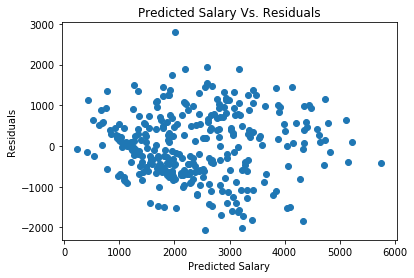

In [57]:
##sanity check - let's make sure our errors are somewhat evenly distributed
y_pred = ridge.predict(X)
residuals = y - y_pred
plt.scatter(y_pred, residuals)
plt.title("Predicted Salary Vs. Residuals")
plt.xlabel("Predicted Salary")
plt.ylabel("Residuals")

# MODEL 1 -  highest correlated features to sqrtsalary w/ multicollinearity) - regressing on sqrty

In [22]:
#train
y = y_train
X2 = X_train[['GS', 'MP', 'FTA', 'DRB', 'STL', 'TOV', 'PS_Game']]

#test
y_test = y_test 
X_test2 = X_test[['GS', 'MP', 'FTA', 'DRB', 'STL', 'TOV', 'PS_Game']]

# Linear Regression Model

In [23]:
linreg2 = LinearRegression()

#5 fold cross-validation r^2 mean score
linreg2_scores = cross_val_score(linreg2, X2, y, cv=5)

print(np.mean(linreg2_scores))

0.542617606544


In [24]:
linreg2.fit(X2, y)
linreg2.score(X_test2, y_test)

0.5584246073886765

In [25]:
linreg2.score(X2, y)

0.57315701354264925

**very minimal overfitting..**

# Ridge Linear Regression Model

**find the best hyperparameters using grid search**

In [26]:
# Define the parameter values that should be searched
alpha_range = [1e-4, 1e-3, 1.5e-3, 1e-2, 1.5e-2, 1e-1, 1, 5, 10, 50, 100, 1000, 10000, 100000]
normalize_range = [True, False]
print(alpha_range, normalize_range)

# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(alpha=alpha_range, normalize=normalize_range)
print(param_grid)

# Instantiate the grid
grid = GridSearchCV(Ridge(), param_grid, cv=5)
grid.fit(X2, y)

# View best parameter
print("Best parameters set found on development set:")
print()
print(grid.best_params_)
print()
print("Grid scores on development set:")
print()
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']

[0.0001, 0.001, 0.0015, 0.01, 0.015, 0.1, 1, 5, 10, 50, 100, 1000, 10000, 100000] [True, False]
{'alpha': [0.0001, 0.001, 0.0015, 0.01, 0.015, 0.1, 1, 5, 10, 50, 100, 1000, 10000, 100000], 'normalize': [True, False]}
Best parameters set found on development set:

{'alpha': 0.1, 'normalize': True}

Grid scores on development set:



**build ridge model with 'alpha': 0.1, 'normalize': True**

In [27]:
# Run Lasso with optimized alpha and normalize parameters
ridge2 = Ridge(alpha=0.1, normalize=True)

# Fit model
ridge2.fit(X2, y)

# View coefficients and intercept
print('Coefficients:',ridge2.coef_)
print()
print('Intercept:',ridge2.intercept_)

# View each variable and its coefficient
for var, co in zip(nba_df[['GS', 'MP', 'FTA', 'DRB', 'STL', 'TOV', 'PS_Game']], ridge2.coef_):
    print(var, co)

Coefficients: [   5.63586147   33.37029035   59.60612318  144.14724624  168.53067222
   13.26046716   33.16364661]

Intercept: 511.627986345
GS 5.63586147179
MP 33.370290353
FTA 59.6061231751
DRB 144.147246243
STL 168.530672218
TOV 13.2604671577
PS_Game 33.1636466149


In [28]:
#5 fold cross-validation r^2 mean score
ridge_scores2 = cross_val_score(ridge2, X2, y, cv=5)

print(np.mean(ridge_scores2))

0.545182188956


# Lasso Linear Regression Model

**find the best hyperparameters using grid search**

In [29]:
# Define the parameter values that should be searched
alpha_range = [1e-4, 1e-3, 1.5e-3, 1e-2, 1.5e-2, 1e-1, 1, 5, 10, 50, 100, 1000, 10000, 100000]
normalize_range = [True, False]
print(alpha_range, normalize_range)

# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(alpha=alpha_range, normalize=normalize_range)
print(param_grid)

# Instantiate the grid
grid = GridSearchCV(Lasso(), param_grid, cv=5)
grid.fit(X2, y)

# View best parameter
print("Best parameters set found on development set:")
print()
print(grid.best_params_)
print()
print("Grid scores on development set:")
print()
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']

[0.0001, 0.001, 0.0015, 0.01, 0.015, 0.1, 1, 5, 10, 50, 100, 1000, 10000, 100000] [True, False]
{'alpha': [0.0001, 0.001, 0.0015, 0.01, 0.015, 0.1, 1, 5, 10, 50, 100, 1000, 10000, 100000], 'normalize': [True, False]}
Best parameters set found on development set:

{'alpha': 10, 'normalize': False}

Grid scores on development set:



**build lasso model with 'alpha': 10, 'normalize': False**

In [30]:
# Run Lasso with optimized alpha and normalize parameters
lasso2 = Lasso(alpha=10, normalize=False)

# Fit model
lasso2.fit(X2, y)

# View coefficients and intercept
print('Coefficients:',lasso2.coef_)
print()
print('Intercept:',lasso2.intercept_)

# View each variable and its coefficient
for var, co in zip(nba_df[['GS', 'MP', 'FTA', 'DRB', 'STL', 'TOV', 'PS_Game']], lasso2.coef_):
    print(var, co)

Coefficients: [   4.68725304   45.96652877   45.60747754  152.28521958    0.           -0.
   34.57168722]

Intercept: 393.349903597
GS 4.68725304069
MP 45.9665287723
FTA 45.6074775429
DRB 152.285219583
STL 0.0
TOV -0.0
PS_Game 34.5716872185


In [31]:
#5 fold cross-validation r^2 mean score
lasso_scores = cross_val_score(lasso2, X2, y, cv=5)

print(np.mean(lasso_scores))

0.544400608773


# ElasticNet

In [32]:
from sklearn.linear_model import ElasticNet

# Define the parameter values that should be searched
alpha_range = [1e-4, 1e-3, 1.5e-3, 1e-2, 1.5e-2, 1e-1, 1, 5, 10, 50, 100, 1000, 10000, 100000]
normalize_range = [True, False]
print(alpha_range, normalize_range)

# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(alpha=alpha_range, normalize=normalize_range)
print(param_grid)

# Instantiate the grid
grid = GridSearchCV(ElasticNet(), param_grid, cv=5)
grid.fit(X2, y)

# View best parameter
print("Best parameters set found on development set:")
print()
print(grid.best_params_)
print()
print("Grid scores on development set:")
print()
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']

[0.0001, 0.001, 0.0015, 0.01, 0.015, 0.1, 1, 5, 10, 50, 100, 1000, 10000, 100000] [True, False]
{'alpha': [0.0001, 0.001, 0.0015, 0.01, 0.015, 0.1, 1, 5, 10, 50, 100, 1000, 10000, 100000], 'normalize': [True, False]}
Best parameters set found on development set:

{'alpha': 0.001, 'normalize': True}

Grid scores on development set:



In [33]:
# Run Lasso with optimized alpha and normalize parameters
eNet2 = ElasticNet(alpha=0.001, normalize=True)

# Fit model
eNet2.fit(X2, y)

# View coefficients and intercept
print('Coefficients:',eNet2.coef_)
print()
print('Intercept:',eNet2.intercept_)

# View each variable and its coefficient
for var, co in zip(nba_df[['GS', 'MP', 'FTA', 'DRB', 'STL', 'TOV', 'PS_Game']], eNet2.coef_):
    print(var, co)

Coefficients: [   5.83398444   30.64535074   61.58483209  137.05895817  185.42779817
   35.29798799   31.62587037]

Intercept: 557.229289741
GS 5.83398443516
MP 30.6453507382
FTA 61.5848320851
DRB 137.058958168
STL 185.427798171
TOV 35.2979879893
PS_Game 31.6258703696


In [34]:
#5 fold cross-validation r^2 mean score
eNet2Score = cross_val_score(eNet2, X2, y, cv=5)

print(np.mean(eNet2Score))

0.545176988459


# MODEL 2 - highest correlated features to sqrtsalary (without multicollinearity) - regressing on sqrty

In [35]:
#train
y = y_train
X3 = X_train[['GS', 'MP', 'FG', 'FGA', 'twoP', 'twoPA', 'FT', 'FTA', 'DRB', 'TRB', 'STL', 'TOV', 'PS_Game']]

#test
y_test = y_test 
X_test3 = X_test[['GS', 'MP', 'FG', 'FGA', 'twoP', 'twoPA', 'FT', 'FTA', 'DRB', 'TRB', 'STL', 'TOV', 'PS_Game']]

# Linear Regression Model

In [36]:
linreg3 = LinearRegression()

#5 fold cross-validation r^2 mean score
linreg3_scores = cross_val_score(linreg3, X3, y, cv=5)

print(np.mean(linreg3_scores))

0.537452714109


In [37]:
linreg3.fit(X3, y)
linreg3.score(X_test3, y_test)

0.56011987697234755

In [38]:
linreg3.score(X3, y)

0.59140320746876829

**there is overfitting!**

# Ridge Linear Regression Model

**find the best hyperparameters using grid search**

In [39]:
# Define the parameter values that should be searched
alpha_range = [1e-4, 1e-3, 1.5e-3, 1e-2, 1.5e-2, 1e-1, 1, 5, 10, 50, 100, 1000, 10000, 100000]
normalize_range = [True, False]
print(alpha_range, normalize_range)

# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(alpha=alpha_range, normalize=normalize_range)
print(param_grid)

# Instantiate the grid
grid = GridSearchCV(Ridge(), param_grid, cv=5)
grid.fit(X3, y)

# View best parameter
print("Best parameters set found on development set:")
print()
print(grid.best_params_)
print()
print()
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']

#grid2, X3, and y 

[0.0001, 0.001, 0.0015, 0.01, 0.015, 0.1, 1, 5, 10, 50, 100, 1000, 10000, 100000] [True, False]
{'alpha': [0.0001, 0.001, 0.0015, 0.01, 0.015, 0.1, 1, 5, 10, 50, 100, 1000, 10000, 100000], 'normalize': [True, False]}
Best parameters set found on development set:

{'alpha': 0.1, 'normalize': True}




**build ridge model with 'alpha': 0.1, 'normalize': True**

In [40]:
# Run Lasso with optimized alpha and normalize parameters
ridge3 = Ridge(alpha=0.1, normalize=True)

# Fit model
ridge3.fit(X3, y)

# View coefficients and intercept
print('Coefficients:',ridge3.coef_)
print()
print('Intercept:',ridge3.intercept_)

# View each variable and its coefficient
for var, co in zip(nba_df[['GS', 'MP', 'FG', 'FGA', 'twoP', 'twoPA', 'FT', 'FTA', 'DRB', 'TRB', 'STL', 'TOV', 'PS_Game']], ridge3.coef_):
    print(var, co)

Coefficients: [   5.3221011    30.1663084    54.13065793   14.70259556  -40.28545646
  -16.04326603   24.91858759   45.17951402   88.19831258   58.25935833
  168.7086629    11.99055764   24.11280191]

Intercept: 495.717072089
GS 5.32210110131
MP 30.1663084024
FG 54.1306579292
FGA 14.7025955611
twoP -40.2854564573
twoPA -16.0432660311
FT 24.9185875888
FTA 45.1795140168
DRB 88.1983125836
TRB 58.259358334
STL 168.708662904
TOV 11.9905576423
PS_Game 24.1128019095


In [41]:
#5 fold cross-validation r^2 mean score
ridge_scores3 = cross_val_score(ridge3, X3, y, cv=5)

print(np.mean(ridge_scores3))

0.542972968266


# Lasso Linear Regression Model

**find the best hyperparameters using grid search**

In [42]:
# Define the parameter values that should be searched
alpha_range = [1e-4, 1e-3, 1.5e-3, 1e-2, 1.5e-2, 1e-1, 1, 5, 10, 50, 100, 1000, 10000, 100000]
normalize_range = [True, False]
print(alpha_range, normalize_range)

# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(alpha=alpha_range, normalize=normalize_range)
print(param_grid)

# Instantiate the grid
grid = GridSearchCV(Lasso(), param_grid, cv=5)
grid.fit(X3, y)

# View best parameter
print("Best parameters set found on development set:")
print()
print(grid.best_params_)
print()
print("Grid scores on development set:")
print()
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']

[0.0001, 0.001, 0.0015, 0.01, 0.015, 0.1, 1, 5, 10, 50, 100, 1000, 10000, 100000] [True, False]
{'alpha': [0.0001, 0.001, 0.0015, 0.01, 0.015, 0.1, 1, 5, 10, 50, 100, 1000, 10000, 100000], 'normalize': [True, False]}
Best parameters set found on development set:

{'alpha': 1, 'normalize': False}

Grid scores on development set:



**build lasso model with 'alpha': 1, 'normalize': False**

In [43]:
# Run Lasso with optimized alpha and normalize parameters
lasso3 = Lasso(alpha=1, normalize=False)

# Fit model
lasso3.fit(X3, y)

# View coefficients and intercept
print('Coefficients:',lasso3.coef_)
print()
print('Intercept:',lasso3.intercept_)

# View each variable and its coefficient
for var, co in zip(nba_df[['GS', 'MP', 'FG', 'FGA', 'twoP', 'twoPA', 'FT', 'FTA', 'DRB', 'TRB', 'STL', 'TOV', 'PS_Game']], lasso3.coef_):
    print(var, co)

Coefficients: [   4.52567391   46.16428274  241.35002914 -386.48225023 -875.09227223
  395.34706465 -379.08642575  185.1187562   140.39504984   20.99040187
   89.91346155   10.31139578  301.0063911 ]

Intercept: 419.296116864
GS 4.52567390832
MP 46.1642827425
FG 241.350029138
FGA -386.482250228
twoP -875.09227223
twoPA 395.347064647
FT -379.08642575
FTA 185.118756196
DRB 140.395049841
TRB 20.9904018698
STL 89.9134615473
TOV 10.3113957781
PS_Game 301.006391103


In [44]:
#5 fold cross-validation r^2 mean score
lasso_scores = cross_val_score(lasso3, X3, y, cv=5)

print(np.mean(lasso_scores))

0.541931850043


# Elastic Net

In [45]:
from sklearn.linear_model import ElasticNet

# Define the parameter values that should be searched
alpha_range = [1e-4, 1e-3, 1.5e-3, 1e-2, 1.5e-2, 1e-1, 1, 5, 10, 50, 100, 1000, 10000, 100000]
normalize_range = [True, False]
print(alpha_range, normalize_range)

# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(alpha=alpha_range, normalize=normalize_range)
print(param_grid)

# Instantiate the grid
grid = GridSearchCV(ElasticNet(), param_grid, cv=5)
grid.fit(X3, y)

# View best parameter
print("Best parameters set found on development set:")
print()
print(grid.best_params_)
print()
print("Grid scores on development set:")
print()
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']

[0.0001, 0.001, 0.0015, 0.01, 0.015, 0.1, 1, 5, 10, 50, 100, 1000, 10000, 100000] [True, False]
{'alpha': [0.0001, 0.001, 0.0015, 0.01, 0.015, 0.1, 1, 5, 10, 50, 100, 1000, 10000, 100000], 'normalize': [True, False]}
Best parameters set found on development set:

{'alpha': 0.001, 'normalize': True}

Grid scores on development set:



In [46]:
# Run Lasso with optimized alpha and normalize parameters
eNet3 = ElasticNet(alpha=0.001, normalize=True)

# Fit model
eNet3.fit(X3, y)

# View coefficients and intercept
print('Coefficients:',eNet3.coef_)
print()
print('Intercept:',eNet3.intercept_)

# View each variable and its coefficient
for var, co in zip(nba_df[['GS', 'MP', 'FG', 'FGA', 'twoP', 'twoPA', 'FT', 'FTA', 'DRB', 'TRB', 'STL', 'TOV', 'PS_Game']], eNet3.coef_):
    print(var, co)

Coefficients: [   5.27638557   26.86687353   47.33473781   16.59416389  -23.51712707
  -10.483995     29.57131467   39.19158041   85.08051332   55.48246375
  189.51007814   21.08033396   20.89255817]

Intercept: 534.838003352
GS 5.27638557468
MP 26.8668735297
FG 47.3347378072
FGA 16.5941638949
twoP -23.5171270677
twoPA -10.4839949964
FT 29.5713146663
FTA 39.1915804066
DRB 85.0805133202
TRB 55.4824637537
STL 189.510078141
TOV 21.0803339595
PS_Game 20.8925581716


In [47]:
#5 fold cross-validation r^2 mean score
eNet3Score = cross_val_score(eNet3, X3, y, cv=5)

print(np.mean(eNet2Score))

0.545176988459


In [48]:
#CHOOSE YOUR MODEL BASED ON THE HIGHEST CROSS VALIDATION SCORE ACROSS ALL FEATURE SETS AND CORRESPONDING MODELS

My best is Model 3 features with Ridge (parameters being 'alpha': 1, 'normalize': False)

# Analysis of my best model

- All four of the models are scoring around the same with a score of about 0.5 - ridge of Model3 did the best (0.56)
- The ridge regression model makes the most sense intuitively because it is weighting the statistical categories uniformly rather than putting a heavy weight on just one or two categories like the linear regression did

**RMSE**

In [49]:
#calculate rmse
from sklearn.metrics import mean_squared_error
from math import sqrt

y_pred_test = ridge.predict(X_test)

In [50]:
rms = sqrt(mean_squared_error(y_test, y_pred_test))

In [51]:
rms**2

720523.5168880293

In [52]:
#this is a measure of the spread of the y values about the predicted y value. 
#we expect 68% of the y values to be within one r.m.s. error, and 95% to be within two r.m.s. errors of the predicted values
#i am 95% confident that the salary I predict is +- 720523*2

**plotting residuals**

Text(0,0.5,'Residuals')

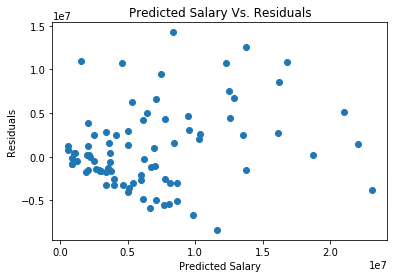

In [58]:
#or should i still be using sqrt(y)?

ridge_resid = (y_test**2) - (y_pred_test**2)
plt.scatter((y_pred_test**2), ridge_resid)
plt.title("Predicted Salary Vs. Residuals")
plt.xlabel("Predicted Salary")
plt.ylabel("Residuals")

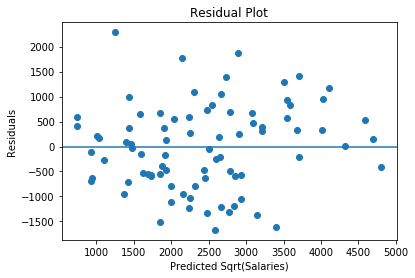

In [54]:
#or should i still be using sqrt(y)?

ridge_resid = (y_test) - (y_pred_test)
plt.scatter((y_pred_test), ridge_resid)

plt.title("Residual Plot")
plt.xlabel("Predicted Sqrt(Salaries)")
plt.ylabel("Residuals")

plt.axhline(0)


plt.savefig('Residual.png')

- relatively homoskedastic (still a bit of hetero in the beginning) - it's clear that there's less variance at low salary levels than middle salary levels

**Plotting actual salary vs. predicted salary using training and testing data**

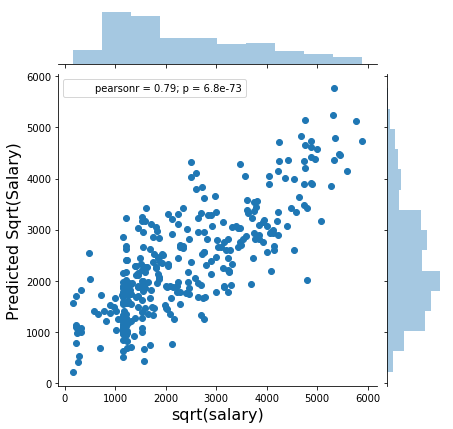

In [59]:
#train data

salary_train_pred = ridge.predict(X)
z = sns.jointplot(y, salary_train_pred)
z.set_axis_labels('sqrt(salary)', 'Predicted Sqrt(Salary)', fontsize=16)

Model is performing pretty well on training data with a pearsonr of 0.81.

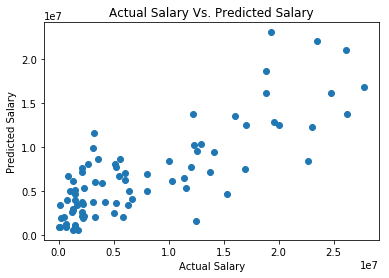

In [60]:
#test data 

plt.scatter(y_test**2, y_pred_test**2)

plt.title("Actual Salary Vs. Predicted Salary")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")

plt.savefig("final_graph")

In [ ]:
#presentation
- go over dataset - scrape, clean, etc (DONE)
- how i transformed my y (DONE)
- how i started building my models (base features) -- show correlation graphs, scores, etc (DONE)
- ^my base r^2 
- how i improved that r^2 - adding more features, transformation, etc (DONE)
- residual plot (DONE)
- final models (DONE)
-interpret coefficients of final model - run stats models will give us the p-values (how stable each coefficient is) low p value --> strong relationship to salary
- multicollinearity in the features (lasso 0-ed out)
- put RMSE (compare y_test_pred and y_test)